In [1]:
import pandas as pd
import spacy
import re
import nltk
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

all_reviews = pd.read_csv('review_data/all_reviews.csv')
all_reviews

,split,review_id,year,category,language,title,excerpt,rating
0,train,0,2007,screen,nb,Rome S02,Toppen innen tv-drama akkurat nå!,6
1,train,1,2007,screen,nb,Twin Peaks - definitive gold box edition,Gull for <em>Twin Peaks</em>-fans!,6
2,train,2,2008,screen,nb,The Wire (sesong 1-4),"The Wire vil gjøre deg avhengig, men på en god...",6
3,train,3,2008,screen,nb,Mad Men (sesong 1),"Stilig, underholdende og sofistikert!",5
4,train,4,2009,screen,nb,Mad Men (sesong 2),TV-underholdning av høyeste kvalitet!,5
...,...,...,...,...,...,...,...,...
38101,dev,706854,2019,misc,nb,«Klarsynt»-portrett med åpenbare mangler,FILMANMELDELSE: Nesten fin film om det alterna...,2
38102,dev,706855,2019,misc,nb,Klassisk soul med sterke harmonier,Fem unge herrer med forbilder som Jackie Wilso...,5
38103,dev,706856,2019,misc,nb,Myk americana om vonde tider,"Sorg kan følge glede, men troen tar ingen fra ...",5
38104,dev,706859,2019,misc,nb,Sjelden vare i flott debut,BOK: En feel good-roman som faktisk makter å f...,5


In [2]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, nlp, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = text.replace('<em>', '')  
    text = text.replace('</em>', '')
    text = text.replace("(<br/>)", "")
    text = text.replace('(<a).*(>).*(</a>)', '')
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ')  
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Lemmatisation (convert the word into root word)
    tmp_text = " ".join(lst_text)
    doc = nlp(tmp_text)
    token_list = [token for token in doc]
    lst_text = [token.lemma_ for token in token_list]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

stopwords_no = nltk.corpus.stopwords.words("norwegian")
nlp = spacy.load("nb_core_news_lg")

all_reviews["text_clean"] = all_reviews["excerpt"].apply(lambda x: utils_preprocess_text(x, nlp, lst_stopwords=stopwords_no))
all_reviews

,split,review_id,year,category,language,title,excerpt,rating,text_clean
0,train,0,2007,screen,nb,Rome S02,Toppen innen tv-drama akkurat nå!,6,topp innen tvdrama akkurat
1,train,1,2007,screen,nb,Twin Peaks - definitive gold box edition,Gull for <em>Twin Peaks</em>-fans!,6,gull twin peaksfans
2,train,2,2008,screen,nb,The Wire (sesong 1-4),"The Wire vil gjøre deg avhengig, men på en god...",6,the wire gjøre avhengig god måte
3,train,3,2008,screen,nb,Mad Men (sesong 1),"Stilig, underholdende og sofistikert!",5,stilig underholdende sofistikert
4,train,4,2009,screen,nb,Mad Men (sesong 2),TV-underholdning av høyeste kvalitet!,5,tvunderholdning høy kvalitet
...,...,...,...,...,...,...,...,...,...
38101,dev,706854,2019,misc,nb,«Klarsynt»-portrett med åpenbare mangler,FILMANMELDELSE: Nesten fin film om det alterna...,2,filmanmeldelse nesten fin film alternativ må g...
38102,dev,706855,2019,misc,nb,Klassisk soul med sterke harmonier,Fem unge herrer med forbilder som Jackie Wilso...,5,fem ung herre forbilde jackie wilson curtis ma...
38103,dev,706856,2019,misc,nb,Myk americana om vonde tider,"Sorg kan følge glede, men troen tar ingen fra ...",5,sorg følge glede troe ta
38104,dev,706859,2019,misc,nb,Sjelden vare i flott debut,BOK: En feel good-roman som faktisk makter å f...,5,bok feel goodroman faktisk makte formidle hele...


In [3]:
all_reviews['word_count'] = all_reviews["excerpt"].apply(lambda x: len(str(x).split()))
all_reviews['char_count'] = all_reviews["excerpt"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
# all_reviews['sentence_count'] = all_reviews["excerpt"].apply(lambda x: len(str(x).split(".")))
all_reviews['sentence_count'] = all_reviews["excerpt"].apply(lambda x: len(str(x).split(".")) if x[-1] != "." else len(str(x).split(".")) - 1)
all_reviews['avg_word_length'] = all_reviews['char_count'] / all_reviews['word_count']
all_reviews['avg_sentence_length'] = all_reviews['word_count'] / all_reviews['sentence_count']

all_reviews

,split,review_id,year,category,language,title,excerpt,rating,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,train,0,2007,screen,nb,Rome S02,Toppen innen tv-drama akkurat nå!,6,topp innen tvdrama akkurat,5,29,1,5.800000,5.0
1,train,1,2007,screen,nb,Twin Peaks - definitive gold box edition,Gull for <em>Twin Peaks</em>-fans!,6,gull twin peaksfans,4,31,1,7.750000,4.0
2,train,2,2008,screen,nb,The Wire (sesong 1-4),"The Wire vil gjøre deg avhengig, men på en god...",6,the wire gjøre avhengig god måte,11,42,1,3.818182,11.0
3,train,3,2008,screen,nb,Mad Men (sesong 1),"Stilig, underholdende og sofistikert!",5,stilig underholdende sofistikert,4,34,1,8.500000,4.0
4,train,4,2009,screen,nb,Mad Men (sesong 2),TV-underholdning av høyeste kvalitet!,5,tvunderholdning høy kvalitet,4,34,1,8.500000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38101,dev,706854,2019,misc,nb,«Klarsynt»-portrett med åpenbare mangler,FILMANMELDELSE: Nesten fin film om det alterna...,2,filmanmeldelse nesten fin film alternativ må g...,22,106,1,4.818182,22.0
38102,dev,706855,2019,misc,nb,Klassisk soul med sterke harmonier,Fem unge herrer med forbilder som Jackie Wilso...,5,fem ung herre forbilde jackie wilson curtis ma...,13,72,1,5.538462,13.0
38103,dev,706856,2019,misc,nb,Myk americana om vonde tider,"Sorg kan følge glede, men troen tar ingen fra ...",5,sorg følge glede troe ta,10,41,1,4.100000,10.0
38104,dev,706859,2019,misc,nb,Sjelden vare i flott debut,BOK: En feel good-roman som faktisk makter å f...,5,bok feel goodroman faktisk makte formidle hele...,13,69,1,5.307692,13.0


In [4]:
ner = spacy.load("nb_core_news_lg")

## tag text and exctract tags into a list
all_reviews["tags"] = all_reviews["excerpt"].apply(lambda x: [(tag.text, tag.label_) for tag in ner(x).ents])

## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count


## count tags
all_reviews["tags"] = all_reviews["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0
    

## extract features
tags_set = []
for lst in all_reviews["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     all_reviews["tags_"+feature] = all_reviews["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))
## print result
all_reviews

,split,review_id,year,category,language,title,excerpt,rating,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,tags,tags_ORG,tags_MISC,tags_PER,tags_LOC
0,train,0,2007,screen,nb,Rome S02,Toppen innen tv-drama akkurat nå!,6,topp innen tvdrama akkurat,5,29,1,5.800000,5.0,[],0,0,0,0
1,train,1,2007,screen,nb,Twin Peaks - definitive gold box edition,Gull for <em>Twin Peaks</em>-fans!,6,gull twin peaksfans,4,31,1,7.750000,4.0,[],0,0,0,0
2,train,2,2008,screen,nb,The Wire (sesong 1-4),"The Wire vil gjøre deg avhengig, men på en god...",6,the wire gjøre avhengig god måte,11,42,1,3.818182,11.0,"[{('The Wire', 'ORG'): 1}]",1,0,0,0
3,train,3,2008,screen,nb,Mad Men (sesong 1),"Stilig, underholdende og sofistikert!",5,stilig underholdende sofistikert,4,34,1,8.500000,4.0,[],0,0,0,0
4,train,4,2009,screen,nb,Mad Men (sesong 2),TV-underholdning av høyeste kvalitet!,5,tvunderholdning høy kvalitet,4,34,1,8.500000,4.0,[],0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38101,dev,706854,2019,misc,nb,«Klarsynt»-portrett med åpenbare mangler,FILMANMELDELSE: Nesten fin film om det alterna...,2,filmanmeldelse nesten fin film alternativ må g...,22,106,1,4.818182,22.0,"[{('Guds', 'PER'): 1}]",0,0,1,0
38102,dev,706855,2019,misc,nb,Klassisk soul med sterke harmonier,Fem unge herrer med forbilder som Jackie Wilso...,5,fem ung herre forbilde jackie wilson curtis ma...,13,72,1,5.538462,13.0,"[{('Jackie Wilson', 'PER'): 1}, {('Curtis Mayf...",1,0,2,0
38103,dev,706856,2019,misc,nb,Myk americana om vonde tider,"Sorg kan følge glede, men troen tar ingen fra ...",5,sorg følge glede troe ta,10,41,1,4.100000,10.0,[],0,0,0,0
38104,dev,706859,2019,misc,nb,Sjelden vare i flott debut,BOK: En feel good-roman som faktisk makter å f...,5,bok feel goodroman faktisk makte formidle hele...,13,69,1,5.307692,13.0,[],0,0,0,0


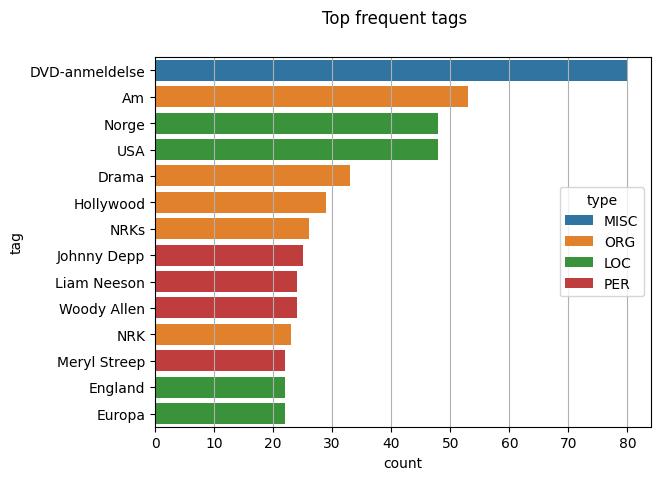

In [5]:
y = "screen"
 
tags_list = all_reviews[all_reviews["category"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags.iloc[:15], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

c:\Users\marcu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marcu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


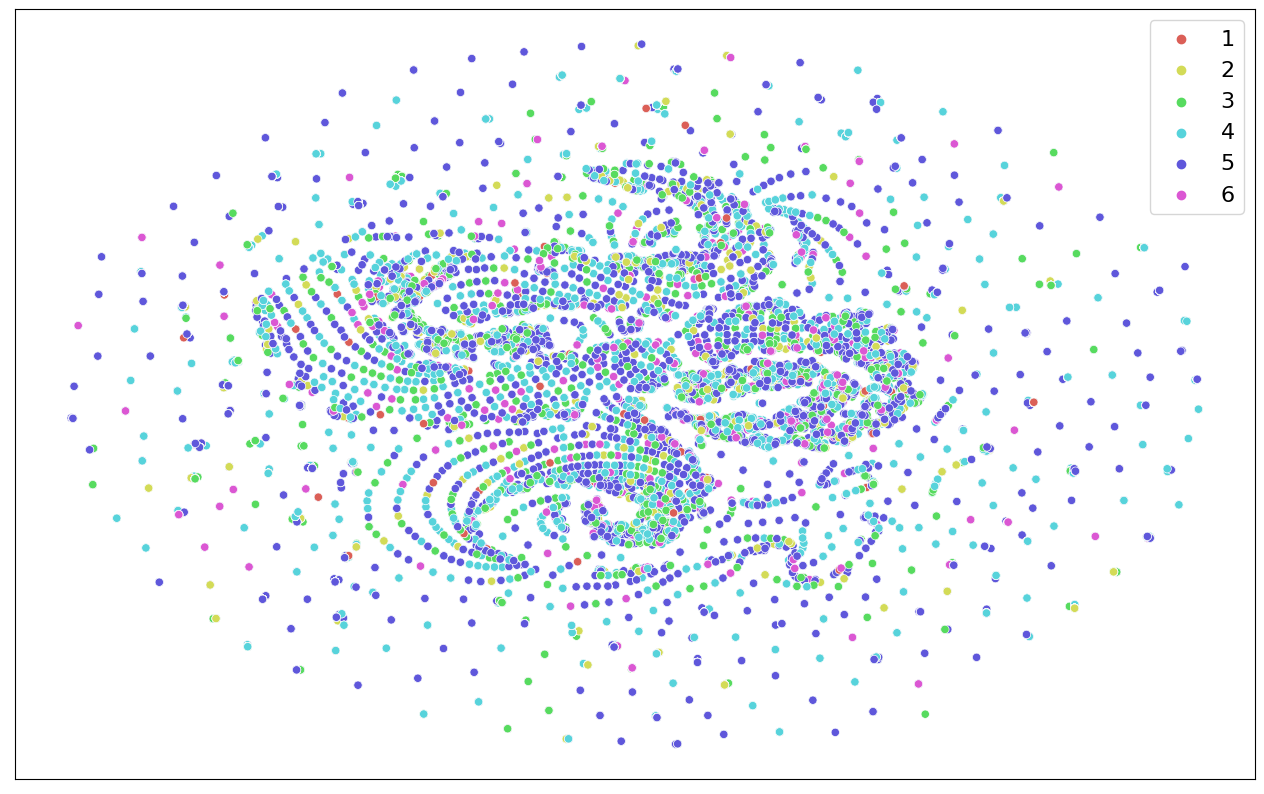

In [31]:
# numeric_reviews = all_reviews[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'tags_MISC', 'tags_PER', 'tags_LOC', 'tags_ORG']]
numeric_reviews = all_reviews[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length']]
labels = all_reviews[['rating']]

tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(numeric_reviews)

labels = labels.to_numpy().flatten()

# Plot t-SNE
plt.figure(figsize=(16,10))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.rc('legend', fontsize=16)
sns.scatterplot(
    x = tsne_res[:,0], 
    y = tsne_res[:,1], 
    hue = labels, 
    palette = sns.hls_palette(6), 
    legend = 'full'
)

# Save plot
plt.savefig('test.png', bbox_inches='tight')